## importing libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
df = pd.read_csv("indian-ev-data.csv")

## cleand the data

In [3]:
df_cleaned = df.dropna()  # Remove rows with missing values

## Summary by Vehicle Type

In [4]:
summary_by_type = df_cleaned.groupby("Vehicle Type").agg({
    "Price": "mean",
    "Battery Capacity (kWh)": "mean",
    "Range per Charge (km)": "mean",
    "Charging Time": "mean",
    "Power (HP or kW)": "mean",
    "Top Speed (km/h)": "mean"
}).round(2)
print(summary_by_type)


                  Price  Battery Capacity (kWh)  Range per Charge (km)  \
Vehicle Type                                                             
Bike          147272.73                    3.77                 139.55   
Scooter       112710.53                    3.01                 114.55   

              Charging Time  Power (HP or kW)  Top Speed (km/h)  
Vehicle Type                                                     
Bike                   3.73             15.09             78.64  
Scooter                3.76              4.39             72.37  


## Feature Selection & Standardization

In [5]:
features = df_cleaned[[
    "Price", "Battery Capacity (kWh)", "Range per Charge (km)",
    "Charging Time", "Power (HP or kW)", "Top Speed (km/h)"
]]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


## Apply KMeans Clustering

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned["Segment"] = kmeans.fit_predict(features_scaled)

/tmp/ipython-input-6-3091764167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Segment"] = kmeans.fit_predict(features_scaled)


## Segment Summary

In [7]:
segment_summary = df_cleaned.groupby("Segment").agg({
    "Price": "mean",
    "Range per Charge (km)": "mean",
    "Power (HP or kW)": "mean",
    "Vehicle Type": lambda x: x.mode()[0]
}).round(2)
print(segment_summary)


             Price  Range per Charge (km)  Power (HP or kW) Vehicle Type
Segment                                                                 
0        250000.00                 200.00             25.00         Bike
1         86307.69                 101.54              3.50      Scooter
2        145450.00                 132.40              8.35      Scooter


## Visualize Segments



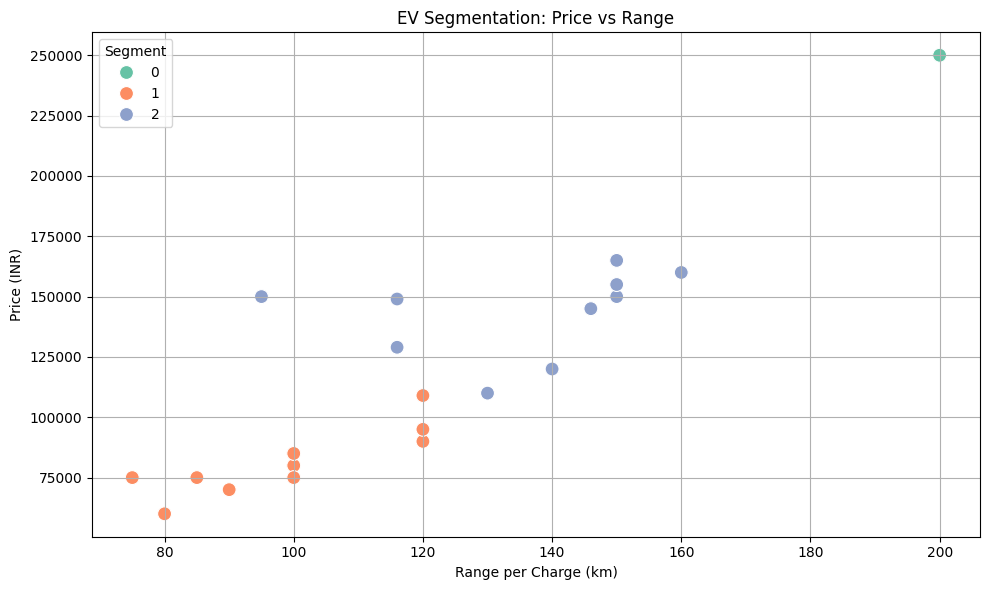

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cleaned,
    x="Range per Charge (km)",
    y="Price",
    hue="Segment",
    palette="Set2",
    s=100
)
plt.title("EV Segmentation: Price vs Range")
plt.xlabel("Range per Charge (km)")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Top Selling Vehicle Types


In [9]:
top_vehicle_types = df_cleaned['Vehicle Type'].value_counts()
print("Top Selling Vehicle Types:\n", top_vehicle_types)

Top Selling Vehicle Types:
 Vehicle Type
Scooter    38
Bike       11
Name: count, dtype: int64


## most popular EV models


Top 10 EV Models Sold:
 Model
Pure EV Epluto 7G        6
Okinawa iPraise Pro      6
Ather 450X               5
Revolt RV400             4
Hero Electric Opto EV    3
Tork T6X                 3
Bajaj Chetak Electric    2
Okinawa iPraise Pro X    2
Bajaj Chetak EV          2
Ampere Reo               2
Name: count, dtype: int64


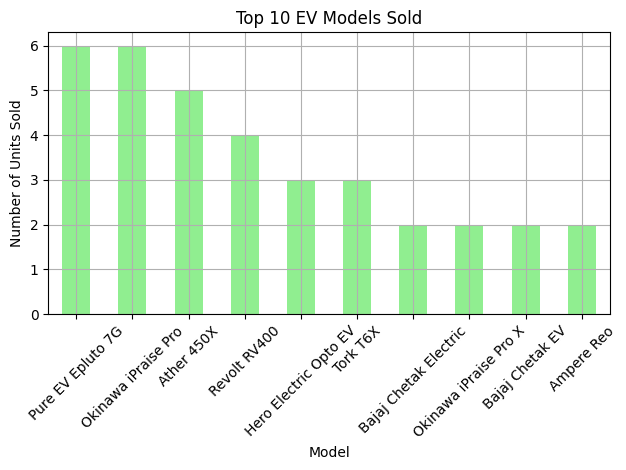

In [10]:
top_models = df_cleaned['Model'].value_counts().head(10)
print("Top 10 EV Models Sold:\n", top_models)

top_models.plot(kind='bar', title='Top 10 EV Models Sold', color='lightgreen')
plt.ylabel("Number of Units Sold")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Trend by Year of Launch / Registration

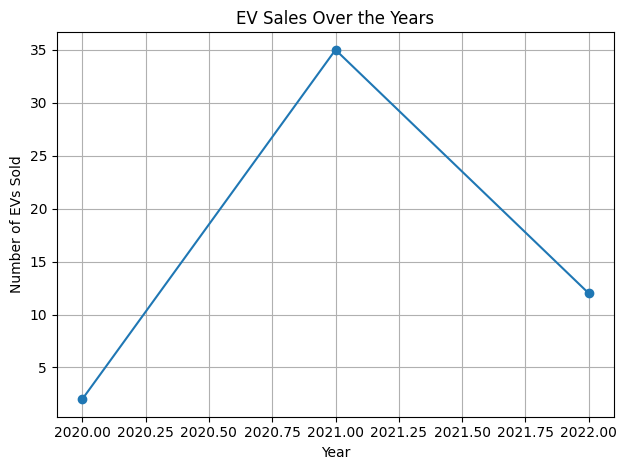

In [11]:
ev_yearly_trend = df_cleaned['Year of Manufacture'].value_counts().sort_index()
ev_yearly_trend.plot(kind='line', marker='o', title='EV Sales Over the Years')
plt.xlabel("Year")
plt.ylabel("Number of EVs Sold")
plt.grid(True)
plt.tight_layout()
plt.show()


## Battery Efficiency Analysis

In [12]:
df_cleaned['Efficiency (km/kWh)'] = df_cleaned['Range per Charge (km)'] / df_cleaned['Battery Capacity (kWh)']
top_efficient = df_cleaned[['Model', 'Efficiency (km/kWh)']].sort_values(by='Efficiency (km/kWh)', ascending=False).head(10)
print("Top 10 Most Efficient EVs:\n", top_efficient)


Top 10 Most Efficient EVs:
                 Model  Efficiency (km/kWh)
6        Revolt RV400            46.875000
13       Revolt RV400            46.875000
26       Revolt RV400            46.875000
37       Revolt RV400            46.875000
15  Pure EV Epluto 7G            44.444444
24  Pure EV Epluto 7G            44.444444
28  Pure EV Epluto 7G            44.444444
9   Pure EV Epluto 7G            44.444444
1   Pure EV Epluto 7G            44.444444
35  Pure EV Epluto 7G            44.444444


/tmp/ipython-input-12-1600029246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Efficiency (km/kWh)'] = df_cleaned['Range per Charge (km)'] / df_cleaned['Battery Capacity (kWh)']


## Price Range Category Segmentation

EV Distribution by Price Segment:
 Price Segment
<50K       0
50K-1L    20
1L-2L     26
2L-5L      3
5L-10L     0
Name: count, dtype: int64


/tmp/ipython-input-13-2741856878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Price Segment'] = pd.cut(df_cleaned['Price'], bins=bins, labels=labels)


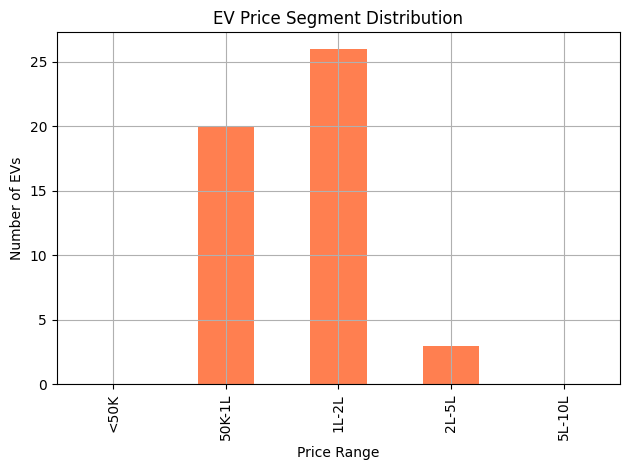

In [13]:
bins = [0, 50000, 100000, 200000, 500000, 1000000]
labels = ['<50K', '50K-1L', '1L-2L', '2L-5L', '5L-10L']
df_cleaned['Price Segment'] = pd.cut(df_cleaned['Price'], bins=bins, labels=labels)

# View distribution
price_segment_dist = df_cleaned['Price Segment'].value_counts().sort_index()
print("EV Distribution by Price Segment:\n", price_segment_dist)

price_segment_dist.plot(kind='bar', title='EV Price Segment Distribution', color='coral')
plt.xlabel("Price Range")
plt.ylabel("Number of EVs")
plt.grid(True)
plt.tight_layout()
plt.show()
